# Data analysis of google apps ratings

## Importing the required python modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the csv file

In [2]:
google_data = pd.read_csv('googleplaystore.csv')

In [3]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
google_data.shape

(10841, 13)

### Summary statistics

In [5]:
google_data.describe() 

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Using boxplot to find any outliers given in the dataset

It can be seen below for the ratings column, there is one app whose rating is more than 5, i.e in this case around 19. This is not possible as ratings range from 0 to 5.

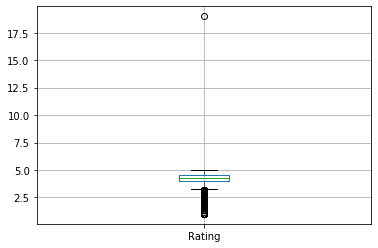

In [6]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0a5806510>]],
      dtype=object)

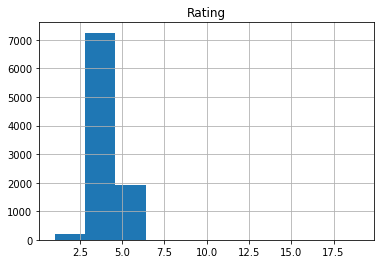

In [7]:
google_data.hist()

## Checking for null values present in the dataset

In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
google_data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

As there was one outlier here with rating more than 5, we remove this entry as it wouldn't affect our algorithm at all

In [11]:
google_data[google_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
google_data.drop([10472], inplace = True)

In [13]:
google_data[10470:10842]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


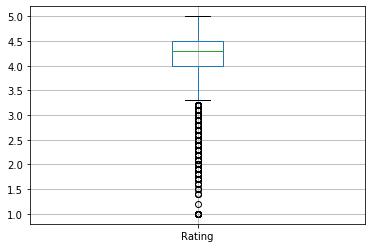

In [14]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0a4f78850>]],
      dtype=object)

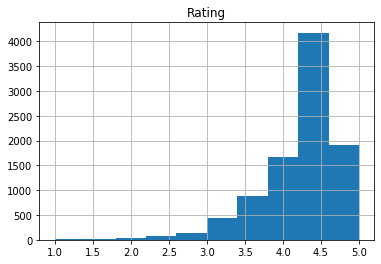

In [15]:
google_data.hist()

In [16]:
threshold = len(google_data)*0.1
threshold

1084.0

In [17]:
google_data.dropna(thresh = threshold, axis = 1, inplace = True)

In [18]:
print(google_data.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [19]:
google_data.shape

(10840, 13)

## Filling the missing values in the dataset

Since in the above histogram, the data is right-skewed, it is not advisable to use mean value of ratings to fill the null-ones. So, we will impute median value of ratings in the places where it is null

In [20]:
def impute_median(series):
    return series.fillna(series.median())

In [21]:
google_data.Rating = google_data['Rating'].transform(impute_median)

In [22]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

## Filling the null categorical data

Modes are calculated for the columns containing categorical data. The modes generated will be used to fill the missing values

In [23]:
# modes of categorical data
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [24]:
# Fill the missing categorical values with the mode values

google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace = True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]), inplace = True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]), inplace = True)

Missing data are now filled

In [25]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Formating the float/numeric data and removing any string elements to become a purely float data

In [26]:
google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
google_data['Price'] = google_data['Price'].apply(lambda x: float(x))
google_data['Reviews'] = pd.to_numeric(google_data['Reviews'], errors = 'coerce')

In [27]:
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

In [28]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
google_data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## Grouping the data category wise and calculating the mean rating, total price and mean reviews of each and every category

In [30]:
grp = google_data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)

print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

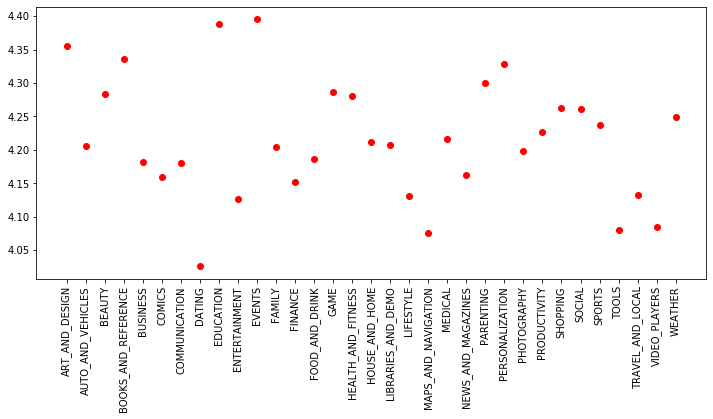

In [31]:
plt.figure(figsize = (12,5))
plt.plot(x, 'ro')
plt.xticks(rotation = 90)
plt.show()

# Q1. Which category app was the most rated in Google Play Store?

It can be seen from the below visualisation that "Education" & "Events" apps are among the most rated. Surprisingly, game apps are not one of the most rated apps. This might only be possible due to reduction in Internet Plans, which has made internet affordable and accessable to almost everyone. 

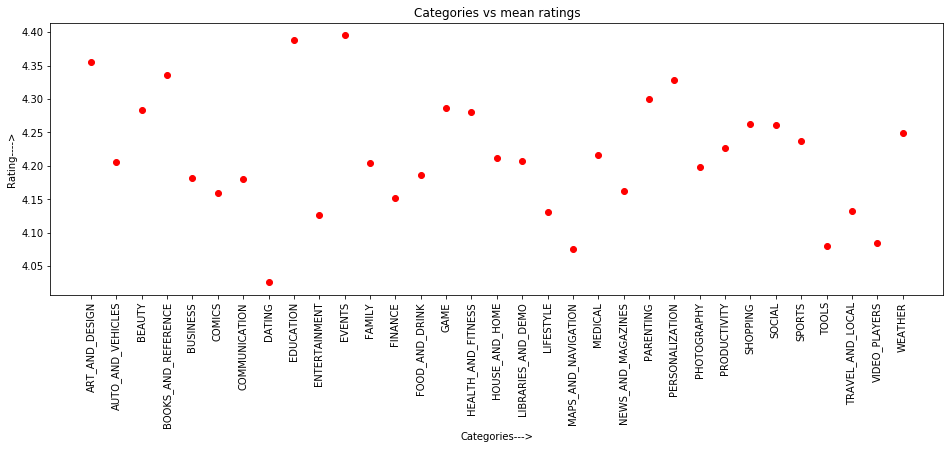

In [32]:
plt.figure(figsize = (16,5))
plt.plot(x, 'ro')
plt.xticks(rotation = 90)
plt.title('Categories vs mean ratings')
plt.xlabel('Categories--->')
plt.ylabel('Rating---->')
plt.show()

# Q2. Which category of apps were among the most spent on in Google Playstore?

It can be seen from the below graph that "Family" & "Finance" based apps were the most spent on

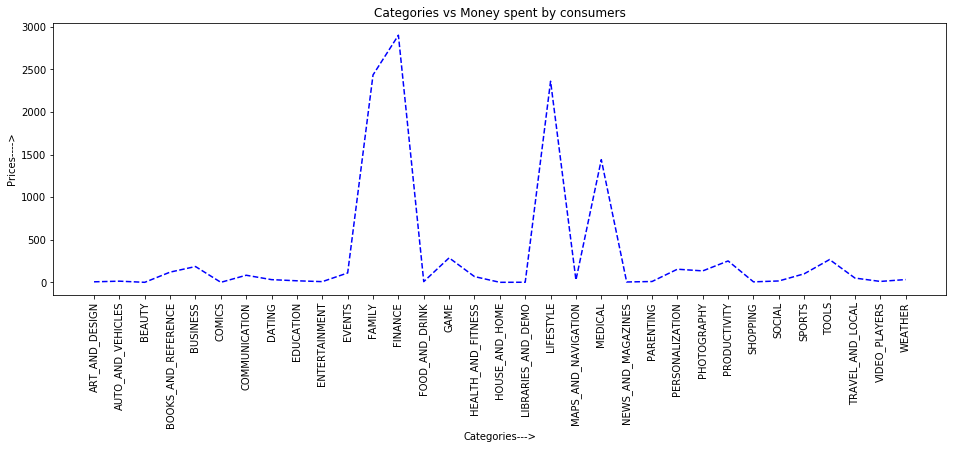

In [33]:
plt.figure(figsize = (16,5))
plt.plot(y, 'r--', color = 'b')
plt.xticks(rotation = 90)
plt.title('Categories vs Money spent by consumers')
plt.xlabel('Categories--->')
plt.ylabel('Prices---->')
plt.show()

# Q3. Which category of apps were among the most reviewed in Google Playstore?

It can be seen from below that "Communications" and "social" apps were the most reviewed.

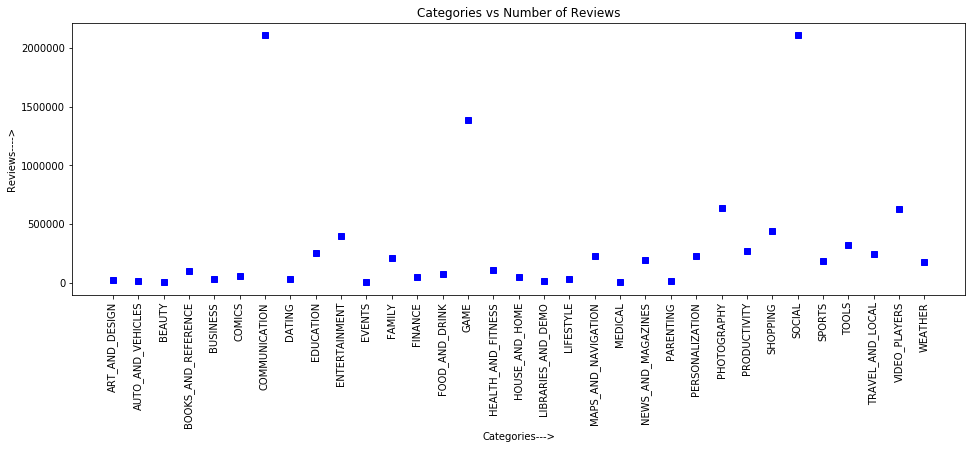

In [34]:
plt.figure(figsize = (16,5))
plt.plot(z, 'bs', color = 'b')
plt.xticks(rotation = 90)
plt.title('Categories vs Number of Reviews')
plt.xlabel('Categories--->')
plt.ylabel('Reviews---->')
plt.show()

# Applying Machine Learning Algorithms

## Random Forest Classifier

In [35]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [36]:
X = google_data[['Rating','Reviews','Installs','Price']]
y = google_data[['Content Rating']]

In [37]:
X

,Rating,Reviews,Installs,Price
0,4.1,159,10000.0,0.0
1,3.9,967,500000.0,0.0
2,4.7,87510,5000000.0,0.0
3,4.5,215644,50000000.0,0.0
4,4.3,967,100000.0,0.0
...,...,...,...,...
10836,4.5,38,5000.0,0.0
10837,5.0,4,100.0,0.0
10838,4.3,3,1000.0,0.0
10839,4.5,114,1000.0,0.0


In [38]:
y

,Content Rating
0,Everyone
1,Everyone
2,Everyone
3,Teen
4,Everyone
...,...
10836,Everyone
10837,Everyone
10838,Everyone
10839,Mature 17+


In [39]:
google_data.shape

(10840, 13)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)


In [41]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

7588
3252
7588
3252


In [42]:
# categories = [cat for cat in google_data['Category'].unique()]

# count = 0
# for c in categories:
#     print(count)
#     count = count+1


In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 500)

clf.fit(X_train, y_train)

/home/akshat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
y_pred = clf.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7872078720787208


## SVM

In [46]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [47]:
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(accuracy_score(y_test, y_pred))

/home/akshat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7958179581795818


## K-Nearest Neighbours

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))

/home/akshat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7933579335793358


# It can be seen that Support Vector Machines(SVM) was the most accurate among the other classification algorithms used in this dataset.